In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson

#Question 1

In [253]:
#adding in the all the datasets from csv file
super_covid = pd.read_csv('super_covid_data-1.csv')
cases_covid = pd.read_csv('covid_confirmed_usafacts.csv')
deaths_covid = pd.read_csv('covid_deaths_usafacts.csv')
populations_covid = pd.read_csv('covid_county_population_usafacts.csv')
populations_covid_upd = pd.read_csv('covid_county_population_usafacts.csv')
president_data = pd.read_csv('president_county_candidate.csv')

super_covid_df = pd.DataFrame(super_covid)

super_covid.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [235]:
cases_covid.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [236]:
deaths_covid.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [237]:
populations_covid.head()

# populations_covid_upd = populations_covid[populations_covid['State'].isin(specified_states)]

# populations_covid_upd

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [238]:
#Filtering out the data to contain only VT
vermont_data = super_covid_df[super_covid_df['State_x'] == 'VT']

vermont_data.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
2806,50001,Addison County,VT,50,0,0,0,0,0,0,...,33,33,33,33,33,33,33,Addison County,VT,36777
2807,50003,Bennington County,VT,50,0,0,0,0,0,0,...,94,94,94,94,94,94,94,Bennington County,VT,35470
2808,50005,Caledonia County,VT,50,0,0,0,0,0,0,...,41,41,41,41,41,41,41,Caledonia County,VT,29993
2809,50007,Chittenden County,VT,50,0,0,0,0,0,0,...,230,230,230,230,230,230,230,Chittenden County,VT,163774
2810,50009,Essex County,VT,50,0,0,0,0,0,0,...,4,4,4,4,4,4,4,Essex County,VT,6163


In [239]:
#Setting my data for vermont of Jan 2020 to decmeber 2020
start_date = '2020-07-01'
end_date = '2020-12-31'

date_columns = [col for col in vermont_data.columns if start_date <= col <= end_date]

non_date_columns = ['County Name_x', 'State_x', 'StateFIPS_x', 'population']
#, 'County Name', 'State'

vermont_data_upd = vermont_data[non_date_columns + date_columns].copy()

vermont_data_upd.head()

#vermont_data_limit = vermont_data[desired_columns].copy()

#vermont_data_limit.head()

,County Name_x,State_x,StateFIPS_x,population,2020-07-01_x,2020-07-02_x,2020-07-03_x,2020-07-04_x,2020-07-05_x,2020-07-06_x,...,2020-12-21_y,2020-12-22_y,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y
2806,Addison County,VT,50,36777,68,68,68,68,68,68,...,4,4,4,4,4,4,4,4,4,4
2807,Bennington County,VT,50,35470,72,72,73,73,73,73,...,2,2,2,2,2,2,3,3,3,3
2808,Caledonia County,VT,50,29993,19,20,20,20,21,21,...,2,3,3,3,3,3,3,3,3,3
2809,Chittenden County,VT,50,163774,608,617,622,623,629,630,...,57,57,59,60,60,61,63,63,64,68
2810,Essex County,VT,50,6163,3,3,3,3,3,4,...,0,0,0,0,0,0,0,0,0,0


In [240]:
#Setting my data for cases of Jan 2020 to decmeber 2020
date_columns = [col for col in cases_covid.columns if start_date <= col <= end_date]

non_date_columns = ['County Name', 'State', 'StateFIPS', 'countyFIPS']

cases_covid_upd = cases_covid[non_date_columns + date_columns].copy()

cases_covid_upd.head()

,County Name,State,StateFIPS,countyFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Autauga County,AL,1,1001,553,561,568,591,615,618,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,Baldwin County,AL,1,1003,703,751,845,863,881,911,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,Barbour County,AL,1,1005,326,335,348,350,352,356,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,Bibb County,AL,1,1007,174,179,189,190,193,197,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


In [241]:
#Setting my data for deaths of Jan 2020 to decmeber 2020
date_columns = [col for col in deaths_covid.columns if start_date <= col <= end_date]

non_date_columns = ['County Name', 'State', 'StateFIPS', 'countyFIPS']

deaths_covid_upd = deaths_covid[non_date_columns + date_columns].copy()

deaths_covid_upd.head()

,County Name,State,StateFIPS,countyFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Autauga County,AL,1,1001,12,13,13,13,13,13,...,44,46,46,46,46,47,47,47,48,48
2,Baldwin County,AL,1,1003,10,10,10,10,10,10,...,149,151,151,151,151,152,152,156,160,161
3,Barbour County,AL,1,1005,1,1,2,2,2,2,...,32,32,32,32,32,32,32,32,32,32
4,Bibb County,AL,1,1007,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


In [242]:
#Setting my data for super_covid of Jan 2020 to decmeber 2020
date_columns = [col for col in super_covid.columns if start_date <= col <= end_date]

non_date_columns = ['County Name', 'State', 'countyFIPS']
#, 'StateFIPS'

super_covid_upd = super_covid[non_date_columns + date_columns].copy()

super_covid_upd.head()

,County Name,State,countyFIPS,2020-07-01_x,2020-07-02_x,2020-07-03_x,2020-07-04_x,2020-07-05_x,2020-07-06_x,2020-07-07_x,...,2020-12-21_y,2020-12-22_y,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y
0,Autauga County,AL,1001,553,561,568,591,615,618,644,...,44,44,46,46,46,46,47,47,47,48
1,Baldwin County,AL,1003,703,751,845,863,881,911,997,...,147,149,151,151,151,151,152,152,156,160
2,Barbour County,AL,1005,326,335,348,350,352,356,360,...,32,32,32,32,32,32,32,32,32,32
3,Bibb County,AL,1007,174,179,189,190,193,197,199,...,42,42,42,42,42,42,42,42,42,46
4,Blount County,AL,1009,218,222,230,234,239,247,255,...,54,54,57,58,58,58,58,58,58,63


In [243]:
#Checking if cases_data contains from Jan 2020 to Dec 2020
vt_cases_date = vermont_data[date_columns].copy()

vt_cases_date.head()

,2020-07-01_x,2020-07-02_x,2020-07-03_x,2020-07-04_x,2020-07-05_x,2020-07-06_x,2020-07-07_x,2020-07-08_x,2020-07-09_x,2020-07-10_x,...,2020-12-21_y,2020-12-22_y,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y
2806,68,68,68,68,68,68,68,68,68,68,...,4,4,4,4,4,4,4,4,4,4
2807,72,72,73,73,73,73,73,73,74,74,...,2,2,2,2,2,2,3,3,3,3
2808,19,20,20,20,21,21,21,21,21,21,...,2,3,3,3,3,3,3,3,3,3
2809,608,617,622,623,629,630,631,632,643,645,...,57,57,59,60,60,61,63,63,64,68
2810,3,3,3,3,3,4,4,4,5,5,...,0,0,0,0,0,0,0,0,0,0


In [244]:
#Switching columns to rows and rows to columns
vt_cases_transposed = vt_cases_date.transpose()

num_rows, num_columns = vt_cases_transposed.shape

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

vt_cases_transposed.head()

Number of Rows: 366
Number of Columns: 14


,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819
2020-07-01_x,68,72,19,608,3,105,10,30,9,14,73,41,94,58
2020-07-02_x,68,72,20,617,3,108,10,31,9,14,73,41,97,59
2020-07-03_x,68,73,20,622,3,110,10,31,9,14,74,41,97,59
2020-07-04_x,68,73,20,623,3,110,10,32,9,14,74,41,97,59
2020-07-05_x,68,73,21,629,3,110,10,34,10,14,74,42,97,59


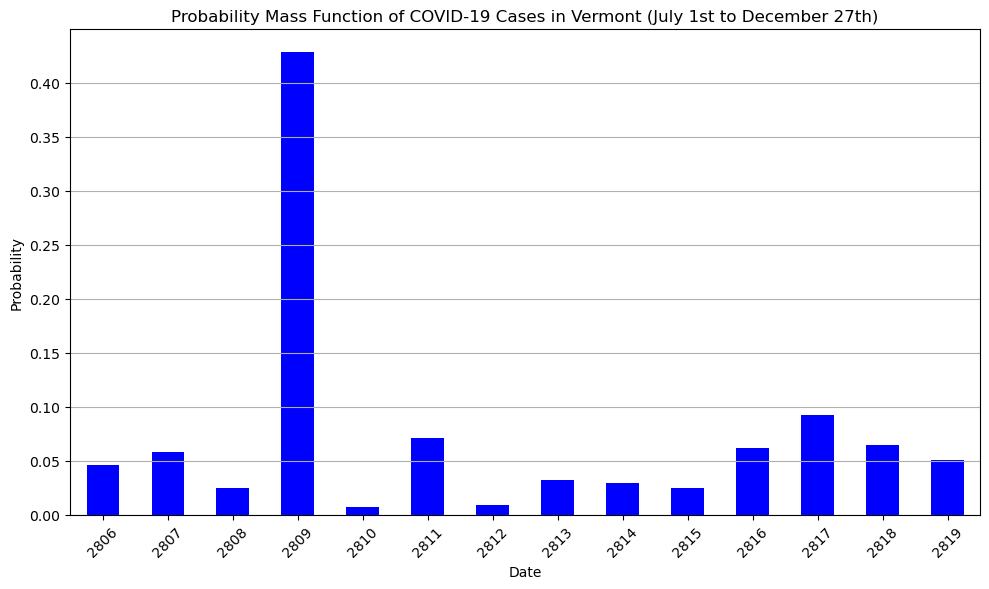

Distribution Statistics:
Mean: 0.07142857142857142
Median: 0.04833919883637336
Mode: 2809
Standard Deviation: 0.10551450870776834


In [245]:
#Creating the pmf data to show a graph containing the mean median max and standard deviation
cases_sum = vt_cases_transposed.sum()

total_cases = cases_sum.sum()
pmf = cases_sum / total_cases

plt.figure(figsize=(10, 6))
pmf.plot(kind='bar', color='blue')
plt.title('Probability Mass Function of COVID-19 Cases in Vermont (July 1st to December 27th)')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribution Statistics
print("Distribution Statistics:")
print("Mean:", pmf.mean())
print("Median:", pmf.median())
print("Mode:", pmf.idxmax())
print("Standard Deviation:", pmf.std())

##Describing the types of distribution and its statistics:
*Modality: There is only one modality within this graph (look at number 3 in date)
*Center: in order to find the center, you can use the mean and median. 
*Variance: The variance for this graph 

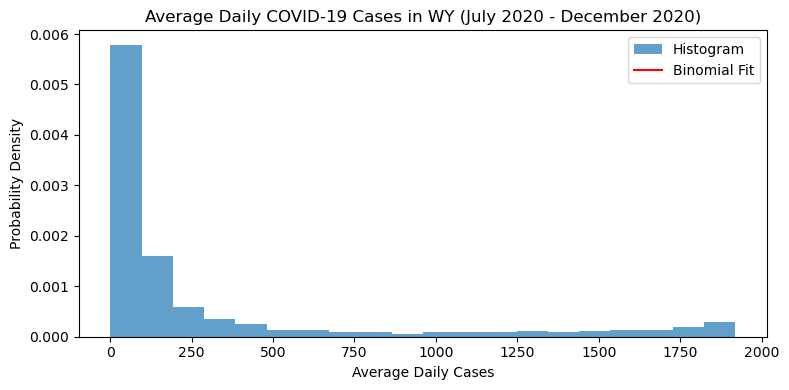

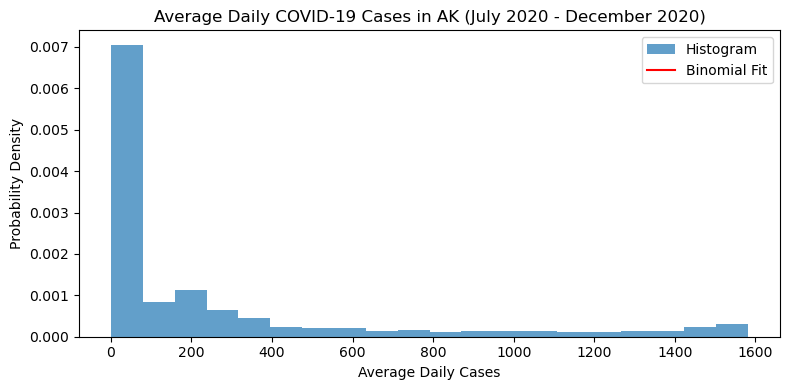

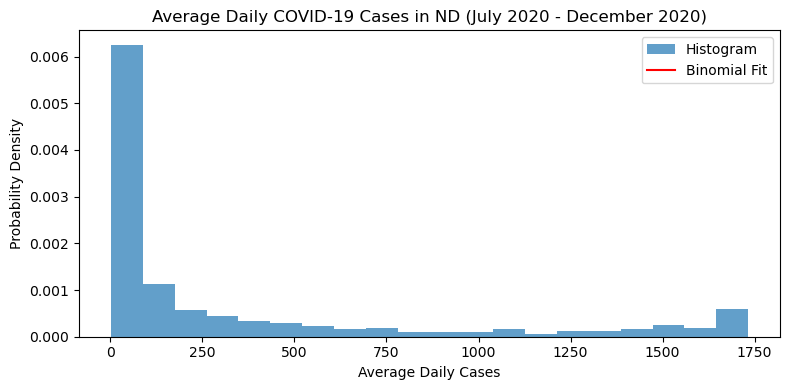

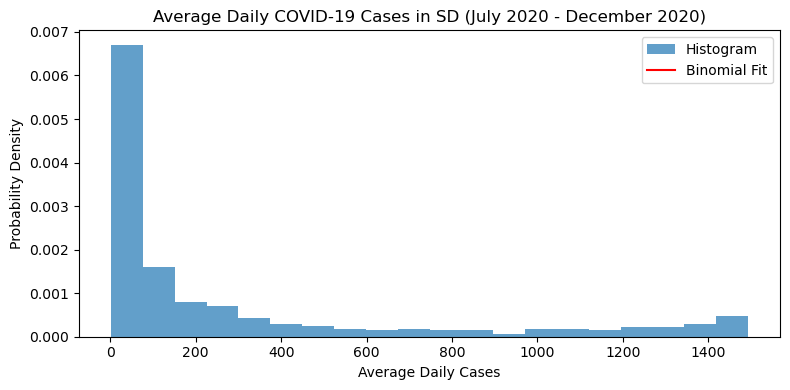

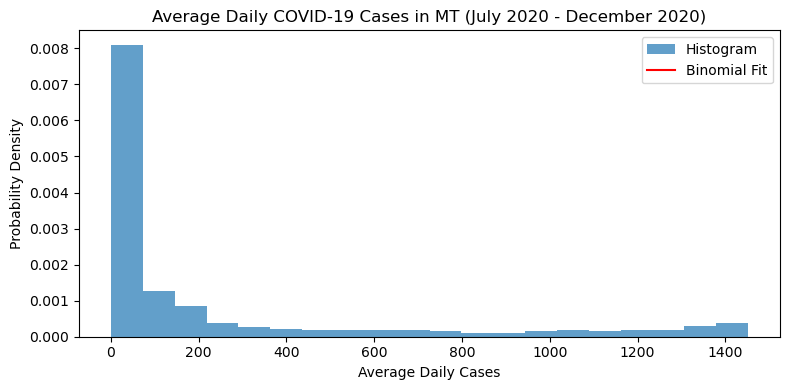

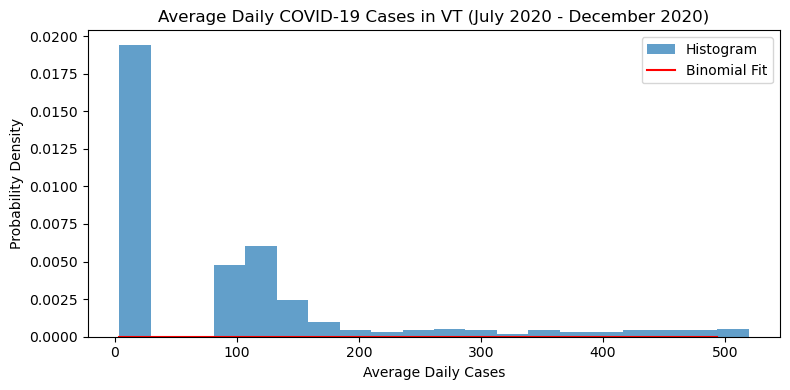

,2020-07-01_x,2020-07-02_x,2020-07-03_x,2020-07-04_x,2020-07-05_x,2020-07-06_x,2020-07-07_x,2020-07-08_x,2020-07-09_x,2020-07-10_x,...,2020-12-21_y,2020-12-22_y,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y,2020-12-28_y,2020-12-29_y,2020-12-30_y
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,63.228216,64.435685,65.543568,66.278008,67.161826,67.912863,68.995851,70.091286,71.721992,73.157676,...,17.352697,17.443983,17.572614,17.688797,17.721992,17.742739,17.809129,18.340249,18.423237,18.580913
std,285.347598,286.962521,288.907091,290.476034,291.497503,292.701620,294.428040,296.471471,298.997522,301.254474,...,30.582744,30.678270,30.866175,31.169006,31.227417,31.263267,31.357430,31.958182,32.089772,32.336555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,12.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,31.000000,34.000000,34.000000,34.000000,34.000000,36.000000,37.000000,37.000000,41.000000,41.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000,20.000000,20.000000
max,3627.000000,3638.000000,3655.000000,3659.000000,3663.000000,3667.000000,3685.000000,3706.000000,3723.000000,3738.000000,...,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,259.000000,259.000000,262.000000


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Filter data for specified states and dates up to December 2020
specified_states = ['WY', 'AK', 'ND', 'SD', 'MT', 'VT']
covid_specified_states = super_covid_upd[(super_covid_upd['State'].isin(specified_states))]

# Filter date columns up to December 2020
date_columns_up_to_dec = [col for col in date_columns if col <= '2020-12-31']


covid_specified_states_filtered = covid_specified_states[['State'] + date_columns_up_to_dec]


summary_statistics = covid_specified_states_filtered[date_columns_up_to_dec].describe()

# Plot individual graphs for each state
for state in specified_states:
    state_data = covid_specified_states_filtered[covid_specified_states_filtered['State'] == state][date_columns_up_to_dec].mean()
    
    plt.figure(figsize=(8, 4))
    

    hist_data, bins, _ = plt.hist(state_data, bins=20, alpha=0.7, label='Histogram', density=True)
    

    n = len(state_data)
    p = np.mean(state_data) / 100 
    
    # Calculate binomial PMF for the same number of bins as the histogram
    binom_pmf = binom.pmf(np.arange(len(hist_data)), n, p)
    

    plt.plot(bins[:-1], binom_pmf, color='red', label='Binomial Fit')
    
    plt.title(f'Average Daily COVID-19 Cases in {state} (July 2020 - December 2020)')
    plt.xlabel('Average Daily Cases')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


summary_statistics.head(10)


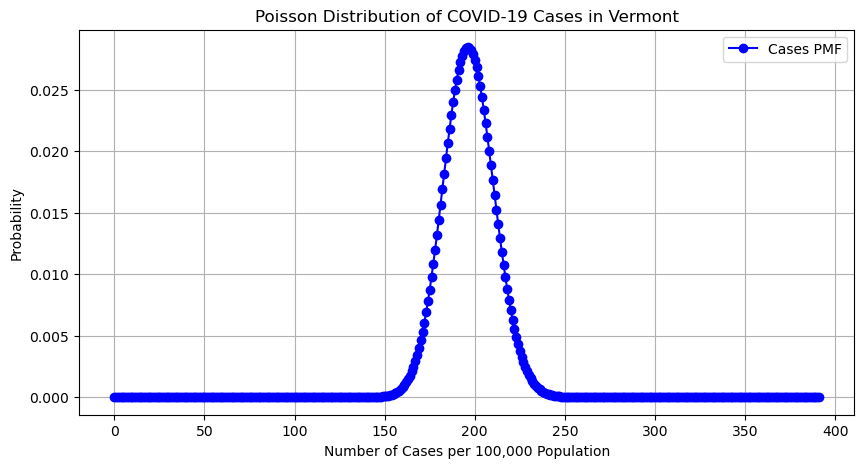

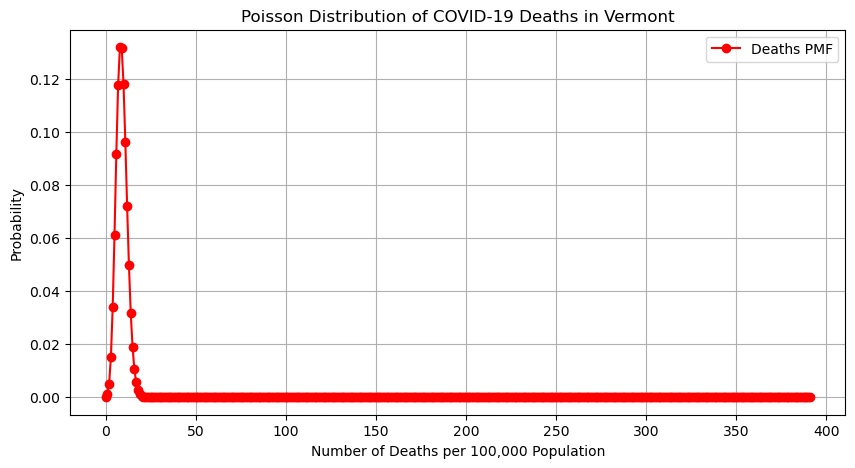

Mean number of cases per 100,000 population in Vermont: 196.63808176105667
Mean number of deaths per 100,000 population in Vermont: 8.974517178988732


In [247]:
vt_pop = populations_covid_upd[populations_covid_upd['State'] == 'VT']['population'].sum()
vt_deaths = deaths_covid_upd[deaths_covid_upd['State'] == 'VT'].sum()[5:]
vt_cases = cases_covid_upd[cases_covid_upd['State'] == 'VT'].sum()[5:]

# Calculate mean number of cases and deaths per 100,000 population for Vermont
vt_cases_per_100k = (vt_cases / vt_pop) * 100000
vt_deaths_per_100k = (vt_deaths / vt_pop) * 100000

vt_cases_per_100k = vt_cases_per_100k.iloc[0]
vt_deaths_per_100k = vt_deaths_per_100k.iloc[0]


vt_poisson_cases = poisson(mu=vt_cases_per_100k)
vt_poisson_deaths = poisson(mu=vt_deaths_per_100k)



x_values = range(int(max(vt_cases_per_100k, vt_deaths_per_100k)) * 2)
vt_cases_pmf = [vt_poisson_cases.pmf(x) for x in x_values]
vt_deaths_pmf = [vt_poisson_deaths.pmf(x) for x in x_values]

# Plot Poisson distribution for Vermont cases
plt.figure(figsize=(10, 5))
plt.plot(x_values, vt_cases_pmf, label='Cases PMF', color='blue', marker='o')
plt.title('Poisson Distribution of COVID-19 Cases in Vermont')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Plot Poisson distribution for Vermont deaths
plt.figure(figsize=(10, 5))
plt.plot(x_values, vt_deaths_pmf, label='Deaths PMF', color='red', marker='o')
plt.title('Poisson Distribution of COVID-19 Deaths in Vermont')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("Mean number of cases per 100,000 population in Vermont:", vt_cases_per_100k)
print("Mean number of deaths per 100,000 population in Vermont:", vt_deaths_per_100k)



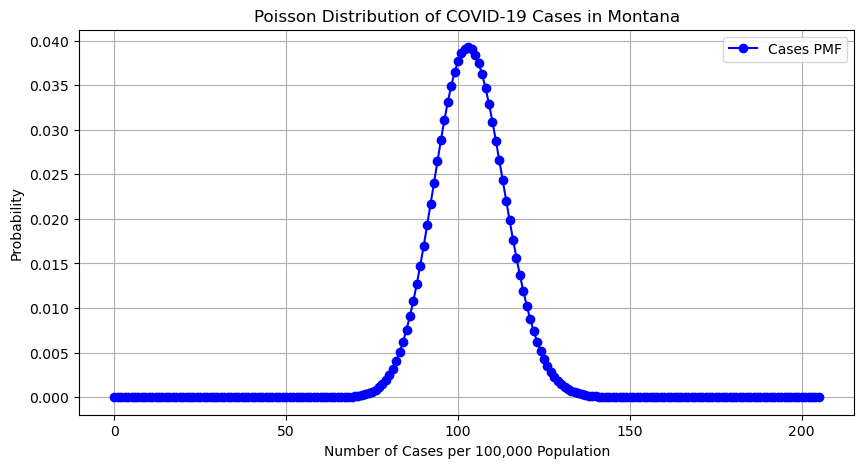

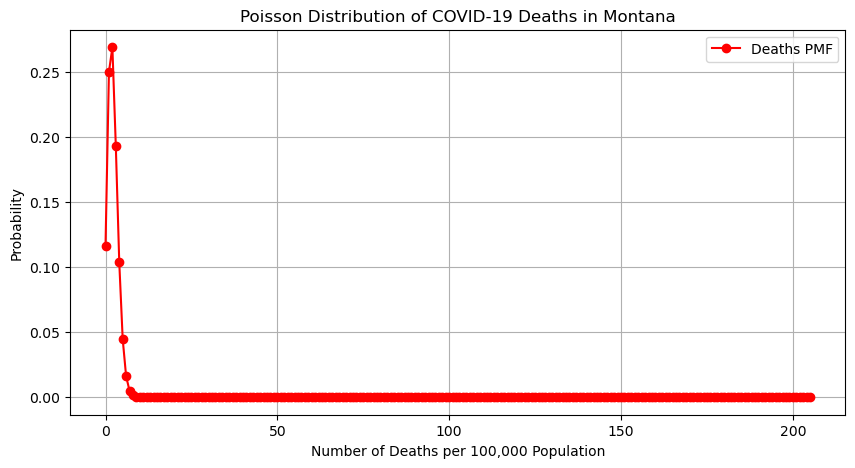

Mean number of cases per 100,000 population in Montana: 103.38910419189018
Mean number of deaths per 100,000 population in Montana: 2.1519904039940942


In [248]:
mt_pop = populations_covid_upd[populations_covid_upd['State'] == 'MT']['population'].sum()

# Calculate total deaths and cases in Montana
mt_deaths = deaths_covid_upd[deaths_covid_upd['State'] == 'MT'].sum()[5:]
mt_cases = cases_covid_upd[cases_covid_upd['State'] == 'MT'].sum()[5:]


mt_cases_per_100k = (mt_cases / mt_pop) * 100000
mt_deaths_per_100k = (mt_deaths / mt_pop) * 100000

mt_cases_per_100k = mt_cases_per_100k.iloc[0]
mt_deaths_per_100k = mt_deaths_per_100k.iloc[0]


mt_poisson_cases = poisson(mu=mt_cases_per_100k)
mt_poisson_deaths = poisson(mu=mt_deaths_per_100k)

# Calculate probability mass function for Montana cases and deaths
x_values = range(int(max(mt_cases_per_100k, mt_deaths_per_100k)) * 2)
mt_cases_pmf = [mt_poisson_cases.pmf(x) for x in x_values]
mt_deaths_pmf = [mt_poisson_deaths.pmf(x) for x in x_values]

# Plot Poisson distribution for Montana cases
plt.figure(figsize=(10, 5))
plt.plot(x_values, mt_cases_pmf, label='Cases PMF', color='blue', marker='o')
plt.title('Poisson Distribution of COVID-19 Cases in Montana')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Plot Poisson distribution for Montana deaths
plt.figure(figsize=(10, 5))
plt.plot(x_values, mt_deaths_pmf, label='Deaths PMF', color='red', marker='o')
plt.title('Poisson Distribution of COVID-19 Deaths in Montana')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("Mean number of cases per 100,000 population in Montana:", mt_cases_per_100k)
print("Mean number of deaths per 100,000 population in Montana:", mt_deaths_per_100k)

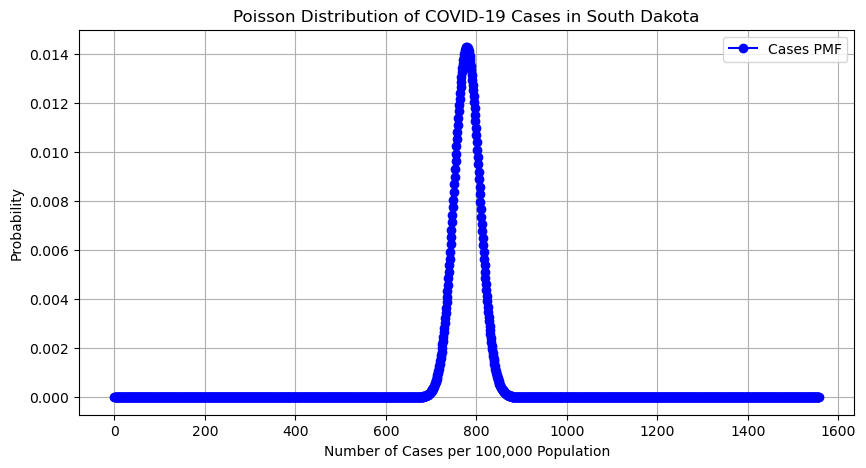

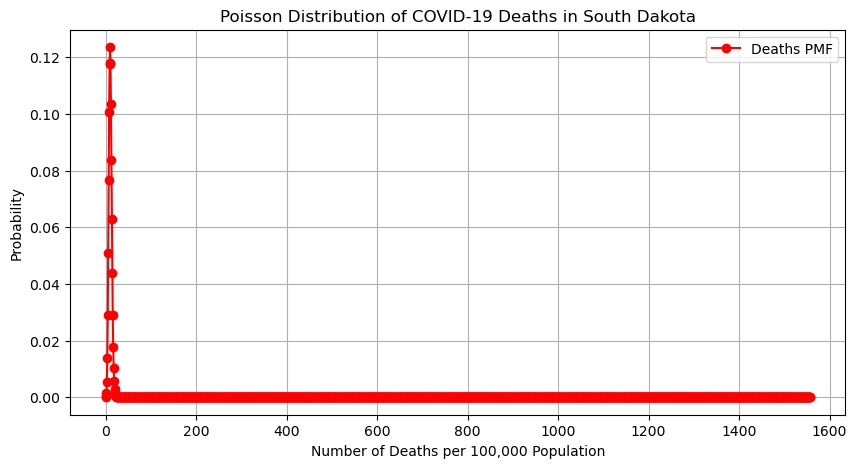

Mean number of cases per 100,000 population in South Dakota: 779.1702791697139
Mean number of deaths per 100,000 population in South Dakota: 10.5125251650636


In [249]:
sd_pop = populations_covid_upd[populations_covid_upd['State'] == 'SD']['population'].sum()

# Calculate total deaths and cases in South Dakota
sd_deaths = deaths_covid_upd[deaths_covid_upd['State'] == 'SD'].sum()[5:]
sd_cases = cases_covid_upd[cases_covid_upd['State'] == 'SD'].sum()[5:]


sd_cases_per_100k = (sd_cases / sd_pop) * 100000
sd_deaths_per_100k = (sd_deaths / sd_pop) * 100000

sd_cases_per_100k = sd_cases_per_100k.iloc[0]
sd_deaths_per_100k = sd_deaths_per_100k.iloc[0]


sd_poisson_cases = poisson(mu=sd_cases_per_100k)
sd_poisson_deaths = poisson(mu=sd_deaths_per_100k)

# Calculate probability mass function for South Dakota cases and deaths
x_values = range(int(max(sd_cases_per_100k, sd_deaths_per_100k)) * 2)
sd_cases_pmf = [sd_poisson_cases.pmf(x) for x in x_values]
sd_deaths_pmf = [sd_poisson_deaths.pmf(x) for x in x_values]

# Plot Poisson distribution for South Dakota cases
plt.figure(figsize=(10, 5))
plt.plot(x_values, sd_cases_pmf, label='Cases PMF', color='blue', marker='o')
plt.title('Poisson Distribution of COVID-19 Cases in South Dakota')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Plot Poisson distribution for South Dakota deaths
plt.figure(figsize=(10, 5))
plt.plot(x_values, sd_deaths_pmf, label='Deaths PMF', color='red', marker='o')
plt.title('Poisson Distribution of COVID-19 Deaths in South Dakota')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("Mean number of cases per 100,000 population in South Dakota:", sd_cases_per_100k)
print("Mean number of deaths per 100,000 population in South Dakota:", sd_deaths_per_100k)

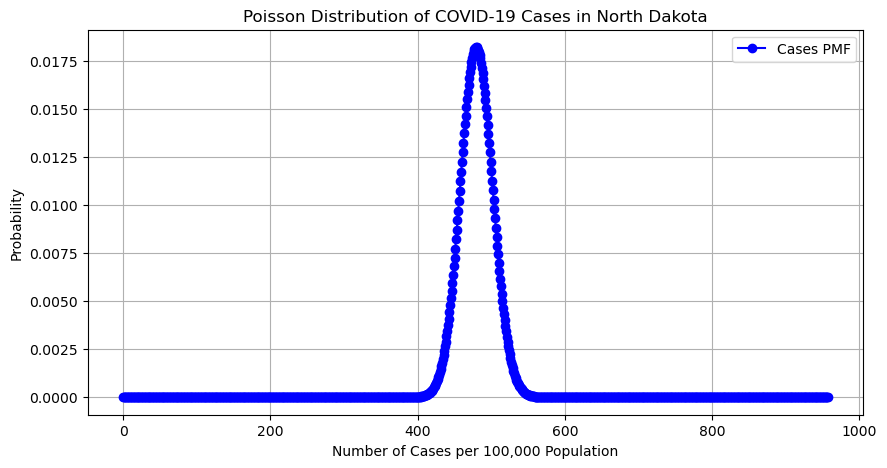

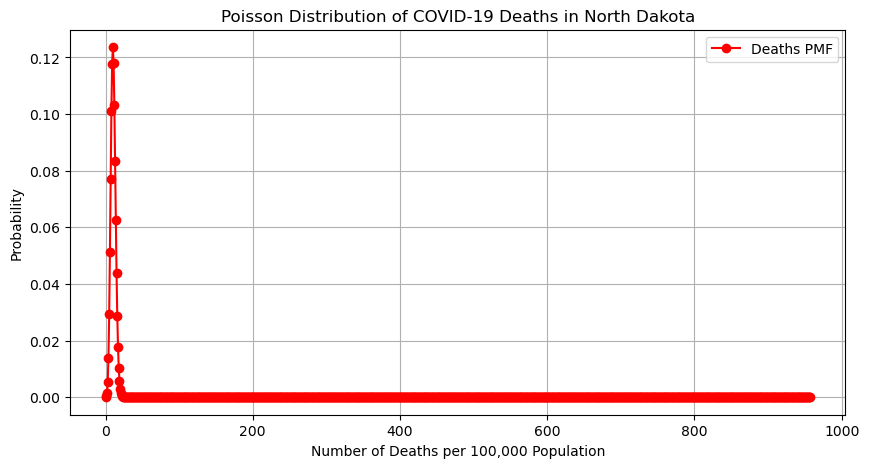

Mean number of cases per 100,000 population in North Dakota: 479.8822143080222
Mean number of deaths per 100,000 population in North Dakota: 10.497833509609455


In [250]:
# Calculate population of North Dakota
nd_pop = populations_covid_upd[populations_covid_upd['State'] == 'ND']['population'].sum()

# Calculate total deaths and cases in North Dakota
nd_deaths = deaths_covid_upd[deaths_covid_upd['State'] == 'ND'].sum()[5:]
nd_cases = cases_covid_upd[cases_covid_upd['State'] == 'ND'].sum()[5:]


nd_cases_per_100k = (nd_cases / nd_pop) * 100000
nd_deaths_per_100k = (nd_deaths / nd_pop) * 100000

nd_cases_per_100k = nd_cases_per_100k.iloc[0]
nd_deaths_per_100k = nd_deaths_per_100k.iloc[0]


nd_poisson_cases = poisson(mu=nd_cases_per_100k)
nd_poisson_deaths = poisson(mu=nd_deaths_per_100k)


x_values = range(int(max(nd_cases_per_100k, nd_deaths_per_100k)) * 2)
nd_cases_pmf = [nd_poisson_cases.pmf(x) for x in x_values]
nd_deaths_pmf = [nd_poisson_deaths.pmf(x) for x in x_values]

# Plot Poisson distribution for North Dakota cases
plt.figure(figsize=(10, 5))
plt.plot(x_values, nd_cases_pmf, label='Cases PMF', color='blue', marker='o')
plt.title('Poisson Distribution of COVID-19 Cases in North Dakota')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Plot Poisson distribution for North Dakota deaths
plt.figure(figsize=(10, 5))
plt.plot(x_values, nd_deaths_pmf, label='Deaths PMF', color='red', marker='o')
plt.title('Poisson Distribution of COVID-19 Deaths in North Dakota')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("Mean number of cases per 100,000 population in North Dakota:", nd_cases_per_100k)
print("Mean number of deaths per 100,000 population in North Dakota:", nd_deaths_per_100k)

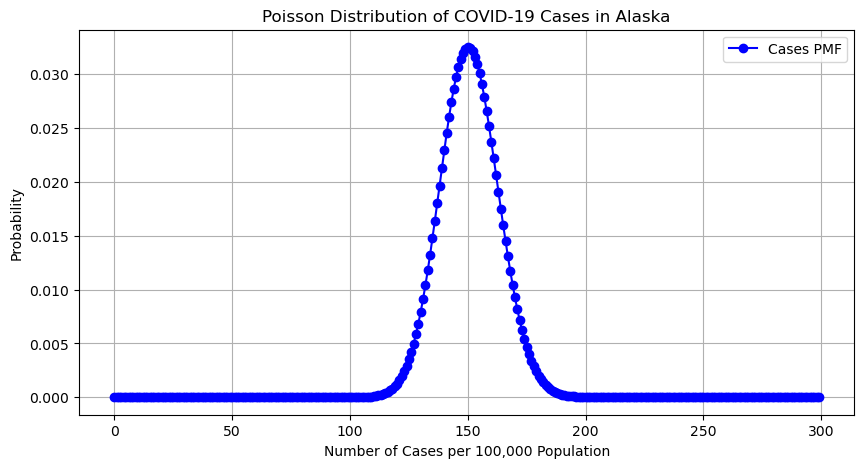

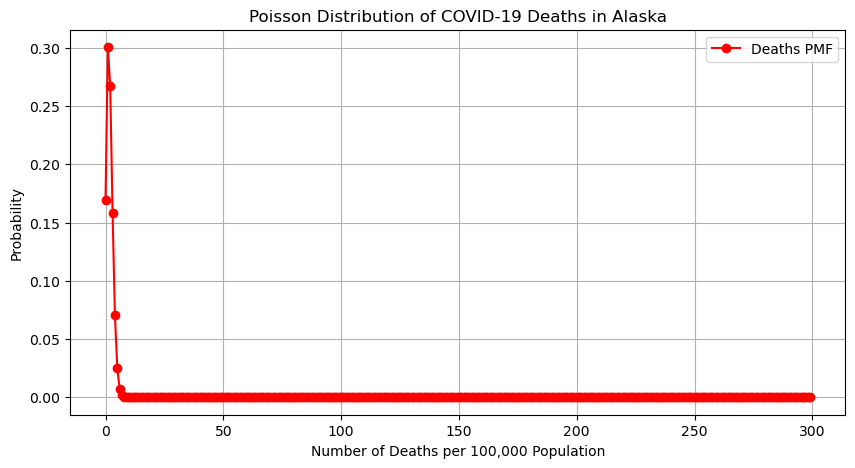

Mean number of cases per 100,000 population in Alaska: 150.64008365855824
Mean number of deaths per 100,000 population in Alaska: 1.7770608780047705


In [251]:
# Calculate population of Alaska
ak_pop = populations_covid_upd[populations_covid_upd['State'] == 'AK']['population'].sum()

# Calculate total deaths and cases in Alaska
ak_deaths = deaths_covid_upd[deaths_covid_upd['State'] == 'AK'].sum()[5:]
ak_cases = cases_covid_upd[cases_covid_upd['State'] == 'AK'].sum()[5:]


ak_cases_per_100k = (ak_cases / ak_pop) * 100000
ak_deaths_per_100k = (ak_deaths / ak_pop) * 100000

ak_cases_per_100k = ak_cases_per_100k.iloc[0]
ak_deaths_per_100k = ak_deaths_per_100k.iloc[0]

# Create Poisson distributions for Alaska cases and deaths
ak_poisson_cases = poisson(mu=ak_cases_per_100k)
ak_poisson_deaths = poisson(mu=ak_deaths_per_100k)


x_values = range(int(max(ak_cases_per_100k, ak_deaths_per_100k)) * 2)
ak_cases_pmf = [ak_poisson_cases.pmf(x) for x in x_values]
ak_deaths_pmf = [ak_poisson_deaths.pmf(x) for x in x_values]

# Plot Poisson distribution for Alaska cases
plt.figure(figsize=(10, 5))
plt.plot(x_values, ak_cases_pmf, label='Cases PMF', color='blue', marker='o')
plt.title('Poisson Distribution of COVID-19 Cases in Alaska')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Plot Poisson distribution for Alaska deaths
plt.figure(figsize=(10, 5))
plt.plot(x_values, ak_deaths_pmf, label='Deaths PMF', color='red', marker='o')
plt.title('Poisson Distribution of COVID-19 Deaths in Alaska')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("Mean number of cases per 100,000 population in Alaska:", ak_cases_per_100k)
print("Mean number of deaths per 100,000 population in Alaska:", ak_deaths_per_100k)

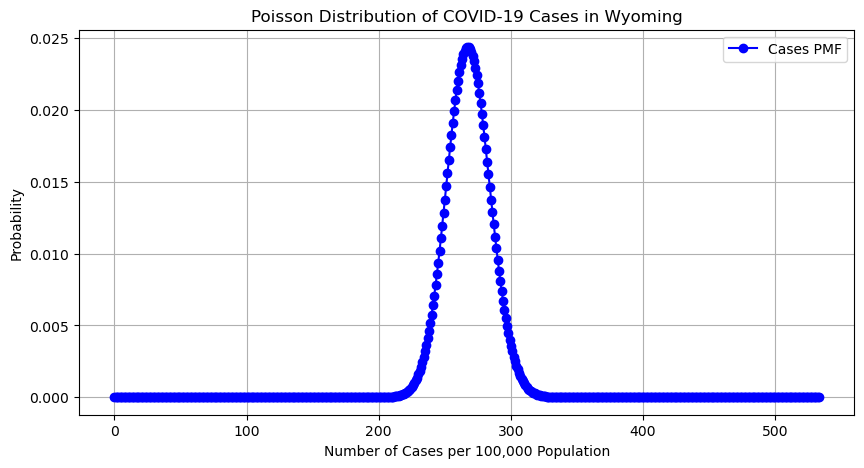

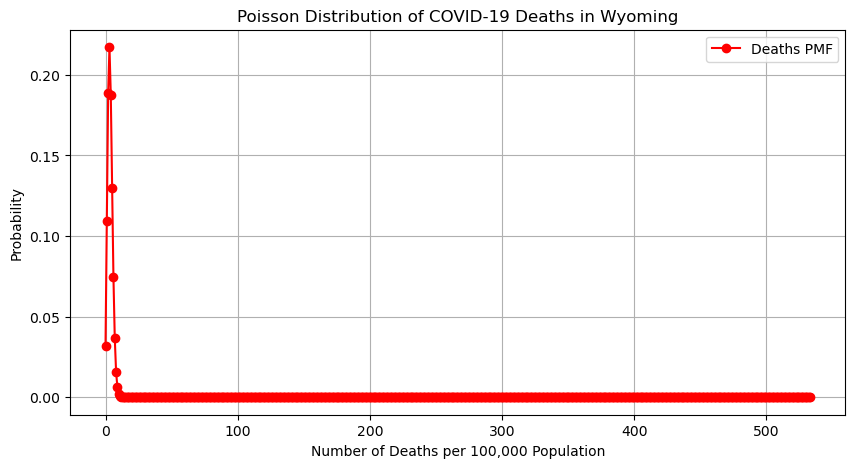

Mean number of cases per 100,000 population in Wyoming: 267.81440979751505
Mean number of deaths per 100,000 population in Wyoming: 3.4556698038389033


In [252]:
# Calculate population of Wyoming
wy_pop = populations_covid_upd[populations_covid_upd['State'] == 'WY']['population'].sum()

# Calculate total deaths and cases in Wyoming
wy_deaths = deaths_covid_upd[deaths_covid_upd['State'] == 'WY'].sum()[5:]
wy_cases = cases_covid_upd[cases_covid_upd['State'] == 'WY'].sum()[5:]


wy_cases_per_100k = (wy_cases / wy_pop) * 100000
wy_deaths_per_100k = (wy_deaths / wy_pop) * 100000

wy_cases_per_100k = wy_cases_per_100k.iloc[0]
wy_deaths_per_100k = wy_deaths_per_100k.iloc[0]


wy_poisson_cases = poisson(mu=wy_cases_per_100k)
wy_poisson_deaths = poisson(mu=wy_deaths_per_100k)

# Calculate probability mass function for Wyoming cases and deaths
x_values = range(int(max(wy_cases_per_100k, wy_deaths_per_100k)) * 2)
wy_cases_pmf = [wy_poisson_cases.pmf(x) for x in x_values]
wy_deaths_pmf = [wy_poisson_deaths.pmf(x) for x in x_values]

# Plot Poisson distribution for Wyoming cases
plt.figure(figsize=(10, 5))
plt.plot(x_values, wy_cases_pmf, label='Cases PMF', color='blue', marker='o')
plt.title('Poisson Distribution of COVID-19 Cases in Wyoming')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Plot Poisson distribution for Wyoming deaths
plt.figure(figsize=(10, 5))
plt.plot(x_values, wy_deaths_pmf, label='Deaths PMF', color='red', marker='o')
plt.title('Poisson Distribution of COVID-19 Deaths in Wyoming')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("Mean number of cases per 100,000 population in Wyoming:", wy_cases_per_100k)
print("Mean number of deaths per 100,000 population in Wyoming:", wy_deaths_per_100k)

#Question 3

In [200]:
#President data from csv
president_data = pd.read_csv('president_county_candidate.csv')

president_data

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [203]:
#Super covid data
super_covid

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,Sweetwater County,WY,42343
3138,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,Teton County,WY,23464
3139,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,Uinta County,WY,20226
3140,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,Washakie County,WY,7805


Spearman's rank correlation coefficient: -0.12816617491903615
Kendall's tau coefficient: -0.09773267838569755


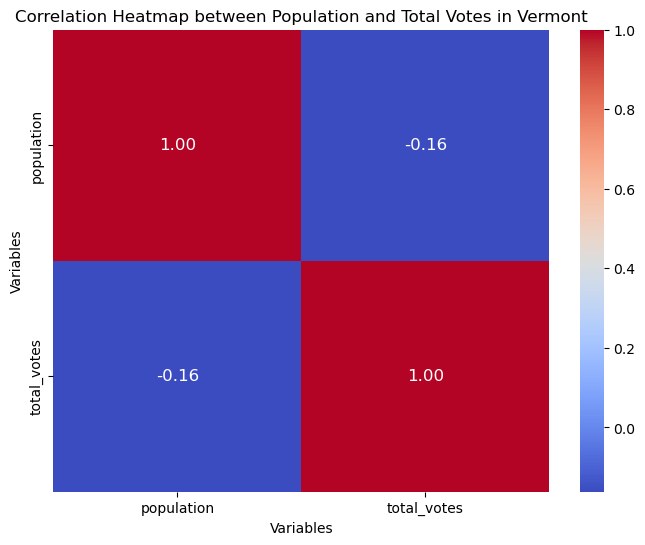

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
covid_data = pd.read_csv('super_covid_data-1.csv')
enrichment_data = pd.read_csv('president_county_candidate.csv')

# Merge datasets on county column
merged_data = pd.merge(covid_data, enrichment_data, left_on='County Name', right_on='county')

# Filter data for Vermont
vt_data = merged_data[merged_data['State'] == 'VT']


spearman_corr = vt_data[['population', 'total_votes']].corr(method='spearman').iloc[0, 1]


kendall_corr = vt_data[['population', 'total_votes']].corr(method='kendall').iloc[0, 1]

print("Spearman's rank correlation coefficient:", spearman_corr)
print("Kendall's tau coefficient:", kendall_corr)

correlation_matrix = vt_data[['population', 'total_votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation Heatmap between Population and Total Votes in Vermont")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

#Question 4

###Hypothesis 1: Voter Turnout and COVID-19 Cases
Hypothesis 1: Is there a correlation between the percentage of eligible voters who had participated in the presidential election and the number of Covid-19

The cause of this can be when there is a high precentage of eligible voters, there will be greater social interactions and large gatherings to celebrate. This can lead to the spread of Covid-19 being spread and can cause health risk's to rize if public health measures are not followed correctly during election electives.


Hypothesis 2: Is there a correlation between political affiliation (percentage of votes for a specific political party) and the number of COVID-19 cases at a state level.

There can be political events and gatherings that are held and can cause more spread of Covid-19. People that are celebrating outdoors have an increase risk of Covid-19 than people that celebrate indoors. Taking health measures by staying indoors and not being in contact with anyone for some time can help a lot in the decrease of Contracting Covid-19.


Hypothesis 3: Is there a Correlation between COVID-19 case rates between urban and rural areas within a state.

Being in Urban areas are mostly prone to experience higher levels of Covid-19 with their social gatherings and interactions with other people. Political events and group meetings often occur in urban centers, which further increasing the risk of contracting Covid-19. 